# Ch `03`: Concept `01`

## Linear regression

Import TensorFlow for the learning algorithm. We'll need NumPy to set up the initial data. And we'll use matplotlib to visualize our data.

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Define some constants used by the learning algorithm. There are called hyper-parameters.

In [2]:
learning_rate = 0.01
training_epochs = 100

Set up fake data that we will use to to find a best fit line

In [3]:
# Set random seed
np.random.seed(1)

In [4]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

In [5]:
x_train.shape

(101,)

In [6]:
np.random.randn(*x_train.shape)

array([ 1.2245077 ,  0.40349164,  0.59357852, -1.09491185,  0.16938243,
        0.74055645, -0.9537006 , -0.26621851,  0.03261455, -1.37311732,
        0.31515939,  0.84616065, -0.85951594,  0.35054598, -1.31228341,
       -0.03869551, -1.61577235,  1.12141771,  0.40890054, -0.02461696,
       -0.77516162,  1.27375593,  1.96710175, -1.85798186,  1.23616403,
        1.62765075,  0.3380117 , -1.19926803,  0.86334532, -0.1809203 ,
       -0.60392063, -1.23005814,  0.5505375 ,  0.79280687, -0.62353073,
        0.52057634, -1.14434139,  0.80186103,  0.0465673 , -0.18656977,
       -0.10174587,  0.86888616,  0.75041164,  0.52946532,  0.13770121,
        0.07782113,  0.61838026,  0.23249456,  0.68255141, -0.31011677,
       -2.43483776,  1.0388246 ,  2.18697965,  0.44136444, -0.10015523,
       -0.13644474, -0.11905419,  0.01740941, -1.12201873, -0.51709446,
       -0.99702683,  0.24879916, -0.29664115,  0.49521132, -0.17470316,
        0.98633519,  0.2135339 ,  2.19069973, -1.89636092, -0.64

In [7]:
np.random.randn(*x_train.shape).shape

(101,)

Plot the raw data

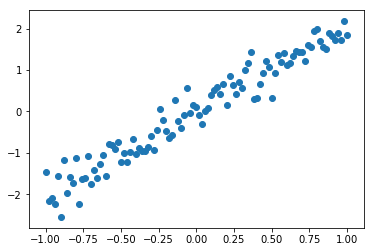

In [8]:
plt.scatter(x_train, y_train)

Set up the input and output nodes as placeholders since the value will be injected by `x_train` and `y_train`.

In [9]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Define the model as `y = w'*x`

In [10]:
def model(X, w):
    return tf.multiply(X, w)

Set up the weights variable

In [11]:
w = tf.Variable(0.0, name="weights")

Define the cost function as the mean squared error

In [12]:
y_model = model(X, w)
cost = tf.reduce_mean(tf.square(Y-y_model))

Define the operation that will be called on each iteration of the learning algorithm

In [13]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Initialize all variables

In [14]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Train on each (x, y) pair multiple times

In [15]:
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

Fetch the value of the learned parameter

In [16]:
w_val = sess.run(w)

In [17]:
sess.close()

Visualize the best fit curve

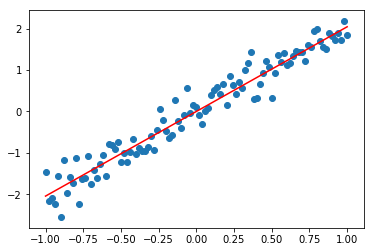

In [18]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()